# Fisrt step with xarray_aita

In this notebook we will see how to load the data and how those data are structured

## Load librairy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import xarrayaita.loadData_aita as lda
import xarrayaita.aita as xa
import xarrayuvecs.uvecs as xu
import xarray as xr

## Open the data
Give the path to the dataset

In [2]:
path='data/orientation_test.dat'
path_micro='data/micro_test.bmp'

In [3]:
data=lda.aita5col(path,path_micro)

## The data strucuture

The data strucutre is a regular `xarray.Dataset`. Therefore it can be use as one. Extra function can be applied to it that are specific for aita data_set using :

`data.xa.FUNCTION`

You can visualised what is store in your `xarray.Dataset` using :

In [4]:
data

<xarray.Dataset>
Dimensions:      (v: 2, x: 1000, y: 2500)
Coordinates:
  * x            (x) float64 0.0 0.02 0.04 0.06 0.08 ... 19.92 19.94 19.96 19.98
  * y            (y) float64 0.0 0.02 0.04 0.06 0.08 ... 49.92 49.94 49.96 49.98
Dimensions without coordinates: v
Data variables:
    orientation  (y, x, v) float64 2.395 0.6451 5.377 ... 0.6395 0.6098 0.6473
    quality      (y, x) int64 0 90 92 93 92 92 94 94 ... 96 96 96 96 96 97 97 96
    micro        (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    grainId      (y, x) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1

### Plotting
Therefore every `Data variable` can be plot using regular xarray ploting function
#### GrainID

Text(0.5, 1.0, 'grainId')

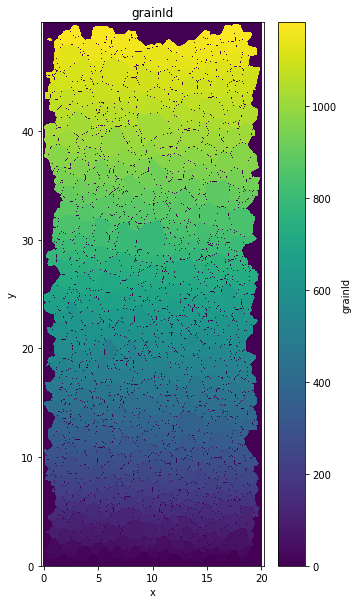

In [5]:
plt.figure(figsize=(5,10))
data.grainId.plot()
plt.axis('equal')
plt.title('grainId')

#### Orientation
The data are store as azimuth and colatitude

Text(0.5, 1.0, 'quality')

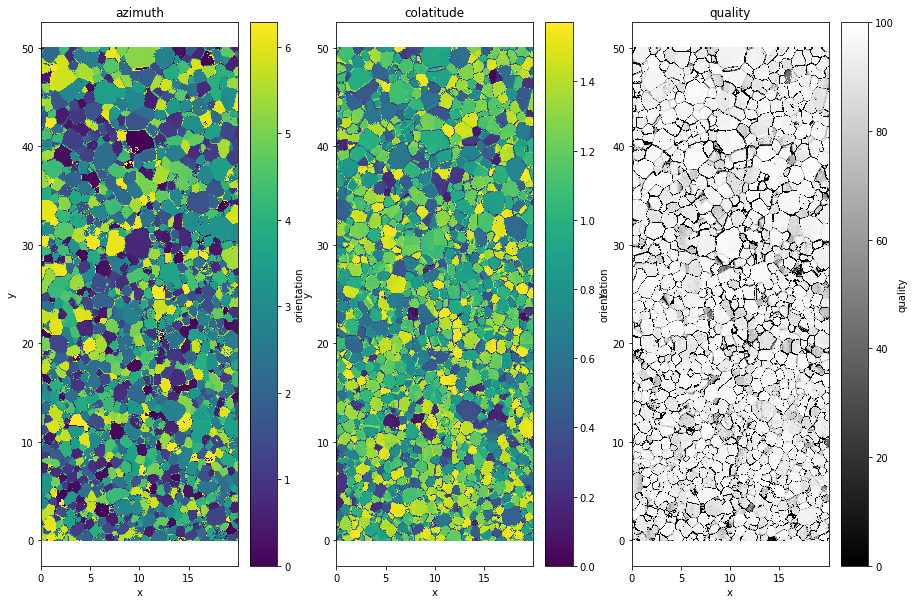

In [6]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
data.orientation[:,:,0].plot()
plt.axis('equal')
plt.title('azimuth')
plt.subplot(1,3,2)
data.orientation[:,:,1].plot()
plt.axis('equal')
plt.title('colatitude')
plt.subplot(1,3,3)
data.quality.plot(cmap=cm.gray)
plt.axis('equal')
plt.title('quality')

If you prefere to look at Bunge Euler angle you can extract them using uvecs

In [7]:
Bunge_Euler=data.orientation.uvecs.bunge_euler()

It is a `xarray.DataArray`. You can save it in your data set if you want :

In [8]:
data['Bunge']=Bunge_Euler

Text(0.5, 1.0, 'phi')

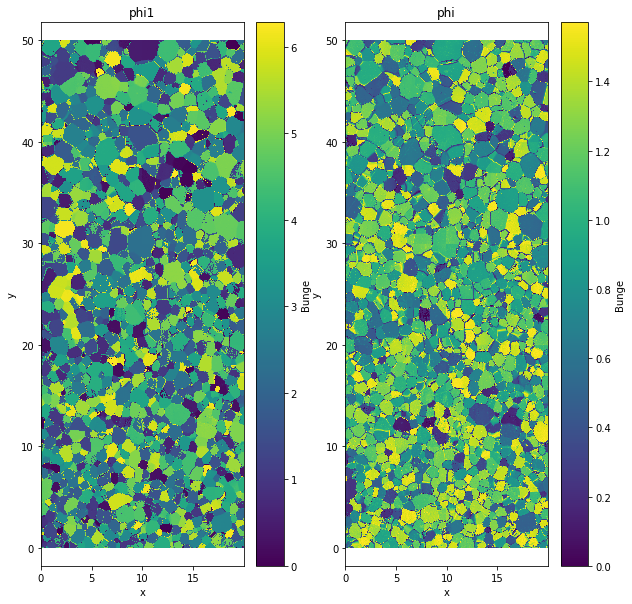

In [9]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
data.Bunge[:,:,0].plot()
plt.axis('equal')
plt.title('phi1')
plt.subplot(1,2,2)
data.Bunge[:,:,1].plot()
plt.axis('equal')
plt.title('phi')

You can also extract the vector in cartesien coordinate. And directly store it in the `xarray.Dataset`.

In [10]:
data['oXYZ']=data.orientation.uvecs.xyz()

Text(0.5, 1.0, 'Z')

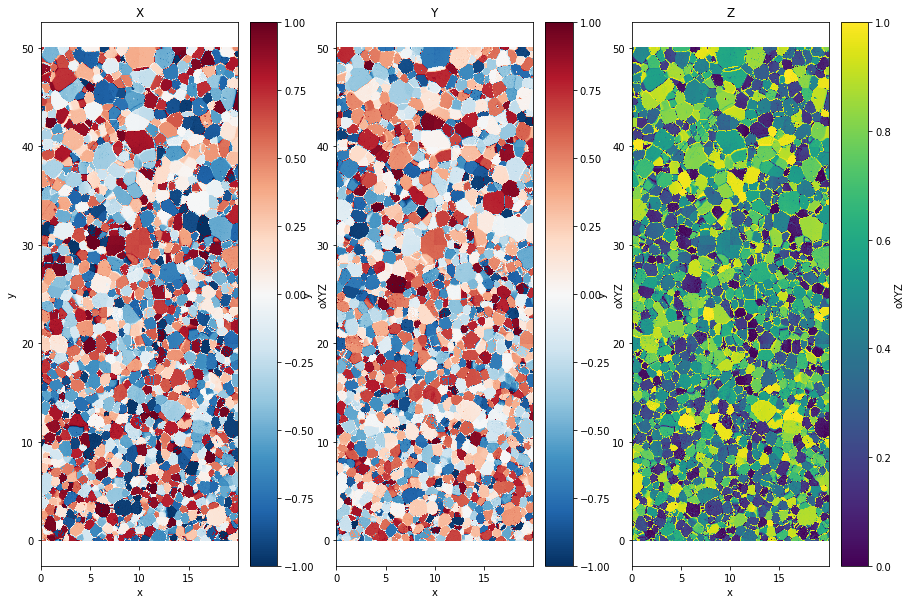

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
data.oXYZ[:,:,0].plot()
plt.axis('equal')
plt.title('X')
plt.subplot(1,3,2)
data.oXYZ[:,:,1].plot()
plt.axis('equal')
plt.title('Y')
plt.subplot(1,3,3)
data.oXYZ[:,:,2].plot()
plt.axis('equal')
plt.title('Z')

All the variable are visible in your `xarray.Dataset`

In [12]:
data

<xarray.Dataset>
Dimensions:      (v: 2, vbe: 2, vc: 3, x: 1000, y: 2500)
Coordinates:
  * x            (x) float64 0.0 0.02 0.04 0.06 0.08 ... 19.92 19.94 19.96 19.98
  * y            (y) float64 0.0 0.02 0.04 0.06 0.08 ... 49.92 49.94 49.96 49.98
Dimensions without coordinates: v, vbe, vc
Data variables:
    orientation  (y, x, v) float64 2.395 0.6451 5.377 ... 0.6395 0.6098 0.6473
    quality      (y, x) int64 0 90 92 93 92 92 94 94 ... 96 96 96 96 96 97 97 96
    micro        (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    grainId      (y, x) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    Bunge        (y, x, vbe) float64 3.966 0.6451 0.6648 ... 0.6395 2.181 0.6473
    oXYZ         (y, x, vc) float64 -0.4412 0.4084 0.7991 ... 0.3454 0.7977

### Filtering